# **Data Science do Zero (Noções fundamentais com Python)**

-----------------------

Esse notebook é baseado ná prática de estudo do livro de Data Science de Joel Grus, as anotações feitas aqui podem ser fieis ao livro ou ser alteradas por motivos de estudos, então os exemplos utilizados servem para trilhar um caminho no aprendizado de Data Science.

-----------------------
[Github do Livro](https://github.com/joelgrus/data-science-from-scratch?tab=readme-ov-file)

-------------------



## **Dados**

> "Dados! Dados! Dados!", esbravejou, impaciente. "Não posso fazer tijolos sem barro." - Arthur Conan Doyle.


Nosso mundo atual está repleto de dados, a cada segundo que se passa a internet acumula mais e mais dados em aplicações e redes sociais, cada passo que damos gera um dado, como nossa localização capturada de nosso smartphone, aparelhos que acompanham batimentos cardiacos.
<br/>
na internet podemos nos encontrar com uma enciclopedia de dados, muitos conjuntos já catalogados prontos para serem estudados.

## **Data Science**

Essa é a area que extrai conhecimento de dados desorganizados.
<br/>
Tendo nela várias sub-áreas:
- Machine Learning
- Análise de Dados
- Business Intelligence

In [204]:
from IPython.display import display
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math

In [205]:
# Análise exemplo para a rede social da DataSciencester

users = [
  { "id": 0, "name": "Hero" },
  { "id": 1, "name": "Dunn" },
  { "id": 2, "name": "Sue" },
  { "id": 3, "name": "Chi" },
  { "id": 4, "name": "Thor" },
  { "id": 5, "name": "Clive" },
  { "id": 6, "name": "Hicks" },
  { "id": 7, "name": "Devin" },
  { "id": 8, "name": "Kate" },
  { "id": 9, "name": "Klein" }
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
 (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [206]:
# Agrupando amigos
friendships = {user["id"]: [] for user in users}

for i, j in friendship_pairs:
  friendships[i].append(j)
  friendships[j].append(i)

friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [207]:
# Somando amigos e tirando a média
def number_of_friends(user):
  """Quantos amigos tem o _user_?"""
  user_id = user["id"]
  friend_ids = friendships[user_id]
  return len(friend_ids)

total_connections = sum(number_of_friends(user) for user in users)

num_users = len(users)
avg_connections = total_connections / num_users

print("Média:", avg_connections)

Média: 2.4


In [208]:
# descrobrir quem tem mais amigos
# criando uma lista (user_id, number_of_friends)
number_of_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

number_of_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse=True)
display(number_of_friends_by_id)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [209]:
# cientista de dados que você talvez conheça
def foaf_ids_bad(user):
  """foaf significa  'friend of friend' [amigo de um amigo]"""
  return list(set([foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id] if foaf_id != user["id"]]))

foaf_ids_bad(users[0])

[1, 2, 3]

In [210]:
# contagem de amigos em comum
from collections import Counter

def friends_of_friends(user):
  """Amigos em comum!"""
  user_id = user["id"]
  return Counter(
      foaf_id
      for friend_id in friendships[user_id]
      for foaf_id in friendships[friend_id]
      if foaf_id != user_id
      and foaf_id not in friendships[user_id]
  )

friends_of_friends(users[3])

Counter({0: 2, 5: 1})

In [211]:
# usuarios com os mesmos interesses
def data_scientists_who_like(target_interest):
  """Encontre os ids dos usuários com o mesmo interesse."""
  return [ user_id
            for user_id, user_interest in interests
           if user_interest == target_interest ]

# funciona, mas tem que buscar na lista inteira a cada interesse
data_scientists_who_like("Java")

[0, 5, 9]

In [212]:
# melhorando a busca sobre interesses
# -----------
# aqui criamos dois dicts que indexam
# os interesses pelo id do usuario ou
# os ids dos usuarios pelo interesse

from collections import defaultdict

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)

print("Usuários por interesse:")
display(user_ids_by_interest)

interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

print("Interesses por usuários:")
display(interests_by_user_id)

Usuários por interesse:


defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

Interesses por usuários:


defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [213]:
def most_common_interests_with(user):
  return Counter(
      interested_user_id
      for interest in interests_by_user_id[user["id"]]
      for interested_user_id in user_ids_by_interest[interest]
      if interested_user_id != user["id"]
  )

most_common_interests_with(users[0])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [214]:
# trazendo lista de possiveis amigos
# removendo os que já são amigos
possible_friend = [ user_id
                      for user_id in
                      list(most_common_interests_with(users[0])) + list(friends_of_friends(users[0]))
                      if user_id not in friendships[0] ]

display(possible_friend)

[9, 8, 5, 3]

In [215]:
# lista anonima de salario e anos de experiência
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
 (48000, 0.7), (76000, 6),
 (69000, 6.5), (76000, 7.5),
 (60000, 2.5), (83000, 10),
 (48000, 1.9), (63000, 4.2)]

In [216]:
# criando dicionario de salario por ano de experiência
# aqui a chave são os anos de experiência e o valor
# é uma lista com os salários por ano de experiência
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

display(salary_by_tenure)

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [217]:
#  Aqui é outrs lista que a chave é os anos de experiência
# e o valor é a média salarial nesse tempo
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

display(average_salary_by_tenure)

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [218]:
# criando buckets de experiências
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"

In [219]:
# agora vamos agrupar os salarios por bucket
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)

display(salary_by_tenure_bucket)

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [220]:
# agora podemos tirar uma média salarial por bucket
average_salary_by_bucket = {
    bucket: sum(salaries) / len(salaries)
    for bucket, salaries in salary_by_tenure_bucket.items()
}

display(average_salary_by_bucket)

percent = round(((average_salary_by_bucket["more than five"] - average_salary_by_bucket["less than two"]) /average_salary_by_bucket["less than two"]) * 100)
print(f"\nDiferença percentual de salário: {percent}%")

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}


Diferença percentual de salário: 65%


In [221]:
# quais são os tópicos de interesse?
words_and_counts = Counter( word
                             for user, interest in interests
                             for word in interest.lower().split() )

display(words_and_counts)

Counter({'hadoop': 2,
         'big': 3,
         'data': 3,
         'hbase': 2,
         'java': 3,
         'spark': 1,
         'storm': 1,
         'cassandra': 2,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'python': 3,
         'scikit-learn': 2,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'learning': 3,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'neural': 2,
         'networks': 2,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

In [222]:
for word, count in words_and_counts.most_common():
  if count > 1:
    print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [223]:
# uma pausa para ver coisas novas, como por exemplo testes

# verdadeiro
try:
  assert 1 + 1 == 2, "1 + 1 should equal 2 but didn't"
except Exception as e:
  print(f"Error: {e}")

# falso
try:
  assert 1 + 1 == 3, "1 + 1 should equal 2 but didn't"
except Exception as e:
  print(f"Error: {e}")

# testando funções
def sumNumber(numberOne, numberTwo):
  return numberOne + numberTwo

# verdadeiro
try:
  assert sumNumber(5, 5) == 10, "sumNumber(5, 5) should equal 10 but didn't"
except Exception as e:
  print(f"Error: {e}")

# falso
try:
  assert sumNumber(5, 6) == 10, "sumNumber(5, 5) should equal 10 but didn't"
except Exception as e:
  print(f"Error: {e}")

Error: 1 + 1 should equal 2 but didn't
Error: sumNumber(5, 5) should equal 10 but didn't


### **Visualizando Dados**
Aqui iniciamos o uso de ferramentas para visualizarmos os dados, nesse exemplo utilizaremos o MatPlotLib.

In [224]:
# importando o módulo pyplot
from matplotlib import pyplot as plt

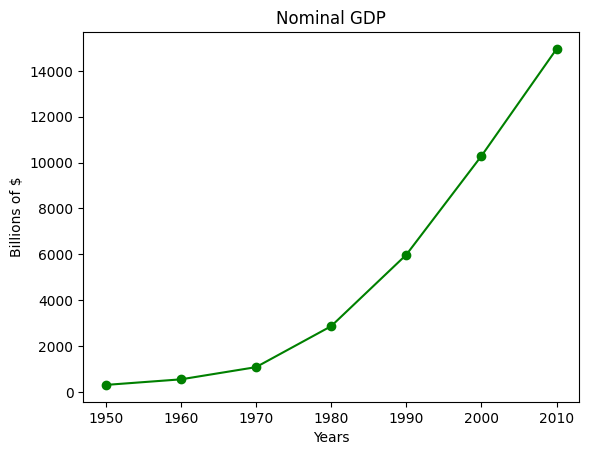

In [225]:
# exemplo de utilização do pyplot

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# criando o gráfico
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# adicione um titulo
plt.title('Nominal GDP')

# adicione um rótulo ao eixo y
plt.ylabel("Billions of $")
plt.xlabel("Years")
plt.show()

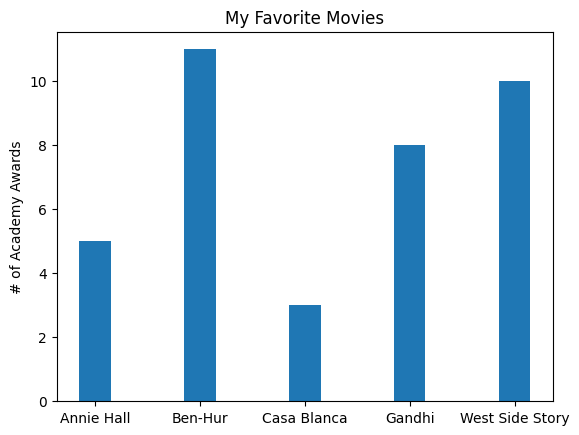

In [226]:
# agora um exemplo do gráfico de barras
movies = ["Annie Hall", "Ben-Hur", "Casa Blanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# criando gráfico de barras
plt.bar(range(len(movies)), num_oscars, 0.3)

# personalizando o gráfico
plt.title("My Favorite Movies")
plt.ylabel("# of Academy Awards")

# rotule o eixo x com os nomes dos filmes nos centros das barras
plt.xticks(range(len(movies)), movies)
plt.show()

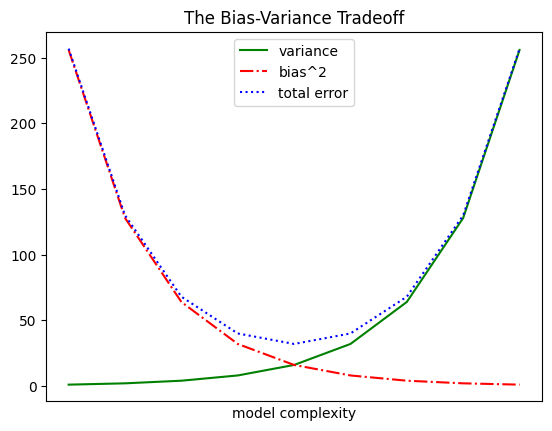

In [227]:
# gráficos de linhas
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

plt.plot(xs, variance, 'g-', label='variance')
plt.plot(xs, bias_squared, 'r-.', label='bias^2')

plt.plot(xs, total_error, 'b:', label='total error')

plt.legend(loc=9)
plt.xlabel('model complexity')
plt.xticks([])
plt.title('The Bias-Variance Tradeoff')
plt.show()

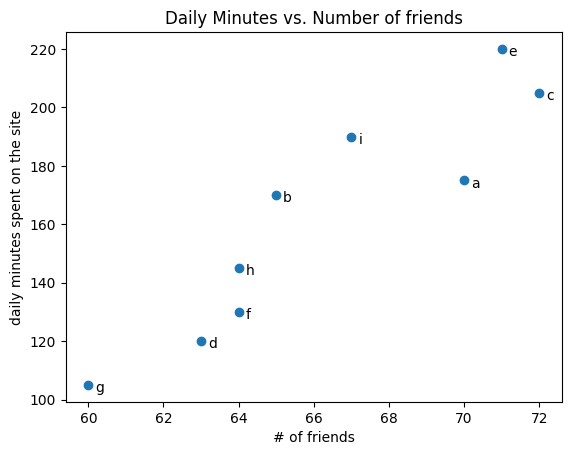

In [228]:
# Gráfico de Dispersão
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

for label, friend_count, minute_count in zip(labels, friends, minutes):
  plt.annotate(label,
               xy=(friend_count, minute_count),
               xytext=(5, -5),
               textcoords='offset points')

plt.title('Daily Minutes vs. Number of friends')
plt.xlabel('# of friends')
plt.ylabel('daily minutes spent on the site')
plt.show()

## **Algebra Linear**

Aprendendo um pouco sobre essa area que é muito importante para o Data Science.
Em python puro as ferramentas para lidar com algebra linear, como por exemplo vetores, não existem, a não ser que usemos algumas bibliotecas, no nosso caso vamos implementar as ferramentas para aprender mais sobre.

In [229]:
from typing import List, Tuple, Callable
from math import sqrt
# *Todas as ferramentas que vamos criar abaixo podem ser encontradas prontas
# no numpy, ou no pandas que possui o numpy em sua composição.

# Vetor type
Vector = List[float]

# Matrix type
Matrix = List[List[float]]

# soma de vetores
def add(v: Vector, w: Vector):
  """Soma os elementos correspondentes!"""
  assert len(v) == len(w), "vectors should be the same length."
  return [v_i + w_i for v_i, w_i in zip(v, w)]

# teste: add
assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9], "Return should be [5, 7, 9]."

# subtração de vetores
def subtract(v: Vector, w: Vector):
  """Subtrai os elementos correspondentes!"""
  assert len(v) == len(w), "vectors should be the same length."
  return [v_i - w_i for v_i, w_i in zip(v, w)]

# teste: subtract
assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3], "Return should be [1, 2, 3]."

# soma de lista de vetores
def vector_sum(vectors: List[Vector]):
  """Soma todos os elementos correspondentes"""
  assert vectors, "no vectors provided"

  num_elements = len(vectors[0])
  assert all(len(v) == num_elements for v in vectors), "different vector size!"

  return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

# teste: vector_sum
assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20], "Return should be [16, 20]."

# multiplicação de vetores
def scalar_multiply(c: float, v: Vector):
  """Multiplica cada elemento por c"""
  return [c * i for i in v]

# teste: scalar_multiply
assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6], "Return should be [2, 4, 6]."

# média dos vetores
def vector_mean(vectors: List[Vector]):
  """Computa média dos elementos"""
  n = len(vectors)
  return scalar_multiply(1/n, vector_sum(vectors))

# teste: vector_mean
assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4], "Return should be [3, 4]."

# produto escalar (dot product)
def dot(v: Vector, w: Vector):
  """Computa v_1 * w_1 + ... + v_n * w_n"""
  assert len(v) == len(w), "vectors must be same length"

  return sum(v_i * w_i for v_i, w_i in zip(v, w))

# teste: dot
assert dot([1, 2, 3], [4, 5, 6]) == 32, "Return shold be equal 32."

# soma dos quadrados de um vetor
def sum_of_squares(v: Vector) -> float:
  """Retorna v_1 * v_1 + ... + v_n * v_n"""
  return dot(v, v)

# teste: sum_of_squares
assert sum_of_squares([1, 2, 3]) == 14, "Return shold be equal 14."

# magnitude do vetor
def magnitude(v: Vector):
  """Retorna a magnitude (ou comprimento) de v"""
  return sqrt(sum_of_squares(v))

# teste: magnitude
assert magnitude([3, 4]) == 5, "Return should be 5"

# distância entre dois vetores
def distance(v: Vector, w: Vector) -> float:
  """Computa a distância entre v e w"""
  return magnitude(subtract(v, w))

# teste: distance
assert distance([1, 2, 3], [1, 2, 3]) == 0.0, "Return should be 0.0"

# revelando linhas e colunas de matriz
def shape(A: Matrix) -> Tuple[int, int]:
  """Retorna (n de linhas de A, n de colunas de A)"""
  num_rows = len(A)
  num_cols = len(A[0])
  return num_rows, num_cols

assert shape([[1, 2, 3], [4, 5, 6]]) == (2, 3), "Return should be (2, 3)"

# obtendo linha
def get_row(A: Matrix, i: int) -> Vector:
  """Retorna a linha i de A (como um Vector)"""
  return A[i]

# obtendo coluna
def get_column(A: Matrix, j: int) -> Vector:
  """Retorna a coluna j de A (como um Vector)"""
  return [A_i[j] for A_i in A]

# fazendo uma matriz
def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
  """
  Retorna uma matriz num_rows x num_cols
  cuja entrada (i,j) é entry_fn(i, j)
  """
  return [[entry_fn(i,j)
            for j in range(num_cols)]
            for i in range(num_rows)]

# matriz de identidade
def identity_matrix(n: int) -> Matrix:
  """Retorna a matriz de identidade n x n"""
  return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(3) == [[1, 0, 0],
                              [0, 1, 0],
                              [0, 0, 1]]

## **Estatística**

Utilizaremos muito a estátistica para lidar com os dados, então aqui abordaremos alguns aprendizados sobre esse conceito matematico.

In [230]:
# diretamente do github do livro
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

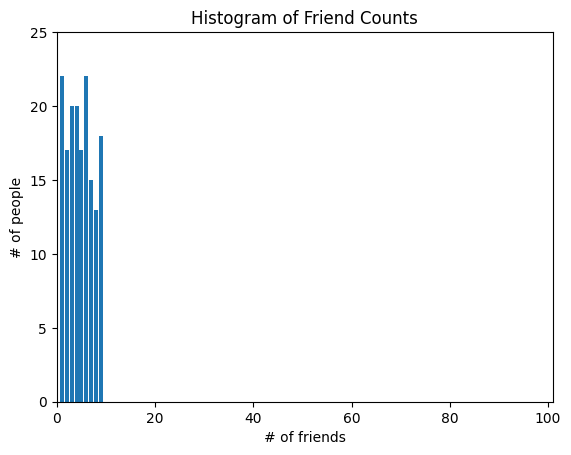

In [231]:
friend_counts = Counter(num_friends)
xs = range(10)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [232]:
num_points = len(num_friends)

In [233]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

In [234]:
# para casos especificos

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

### **Medidas de tendência central**

temos 3 medidas de tendência central média, moda e mediana, elas são tendências que utilizamos para saber sobre o centro de conjuntos de dados.

In [235]:
# função de média
def mean(xs: List[float]) -> float:
  return sum(xs) / len(xs)

mean(num_friends)

7.333333333333333

In [236]:
# mediana
def _median_odd(xs: List[float]) -> float:
  """Se len(xs) for impar, a mediana será o elemento do meio"""
  return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
  """Se len(xs) for par, ela será a média dos dois elementos do meio"""
  sorted_xs = sorted(xs)
  hi_midpoint = len(xs) // 2
  return ((sorted_xs[hi_midpoint - 1]) + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
  """Encontra o valor do meio em v"""
  return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [237]:
print(median(num_friends))

6.0


In [238]:
# quantil
def quantile(xs: List[float], p: float) -> float:
  """Retorna o valor pth-percentil em x"""
  p_index = int(p * len(xs))
  return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

In [239]:
# moda
def mode(x: List[float]) -> List[float]:
  """Retorna uma lista, pois pode haver mais de uma moda"""
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items() if count == max_count]

assert set(mode(num_friends)) == {1, 6}

### **Medidas de Dispersão**

São as medidas utilizadas para saber o quanto os dados estão espalhados, quanto mais próximo de zero menos espalhados estão os dados de um conjunto.

In [240]:
# amplitude
def data_range(xs: List[float]) -> float:
  """Diferença entre o maior e o menor valor"""
  return max(xs) - min(xs)

assert data_range(num_friends) == 99

In [241]:
# variância
def de_mean(xs: List[float]) -> List[float]:
  """Traduza xs subtraindo sua média (para que o resultado tenha média 0)"""
  x_bar = mean(xs)
  return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
  """Quase o desvio quadrado da média"""
  assert len(xs) >= 2, "variance requires at least two elements"

  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55

In [242]:
# desvio padrão
def standard_deviation(xs: List[float]) -> float:
  """O desvio-padrão é a raiz quadrada da variância"""
  return sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

In [243]:
# interquartil
# *serve para amenizar os riscos com os outliers
def interquartile_range(xs: List[float]) -> float:
  """Retorna a diferença entre o percentil 75% e o percentil 25%"""
  return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6

# essa operação quase não é influenciada quando há poucos outliers

### **Correlação**

Correlação é a medida de realacionamente entre duas variaveis de conjunto, e como elas se relacionam, podem ser positivas perfeitas (1), negativas perfeitas (-1) ou não relaciondas (0)

In [244]:
# Exemplo do livro sobre minutos gastos dos usuários online
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
daily_hours = [dm / 60 for dm in daily_minutes]

In [245]:
# covariância
# é um tipo de variância aplicada a pares
# mede a variação simultânea de duas variáveis
def covariance(xs: List[float], ys: List[float]):
  assert len(xs) == len(ys), "xs and ys must have same number of elements"
  return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

# essa não é tão comum de ser calculda em comparação com a correlação

In [246]:
#  correlação
# é a divisão dos desvios padrões de duas variaveis
def correlation(xs: List[float], ys: List[float]):
  """Mede a variação simultânea de xs e ys a partir das suas médias"""
  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(xs, ys) / stdev_x / stdev_y
  else:
    return 0

assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

Text(0.5, 0, 'numero de amigos')

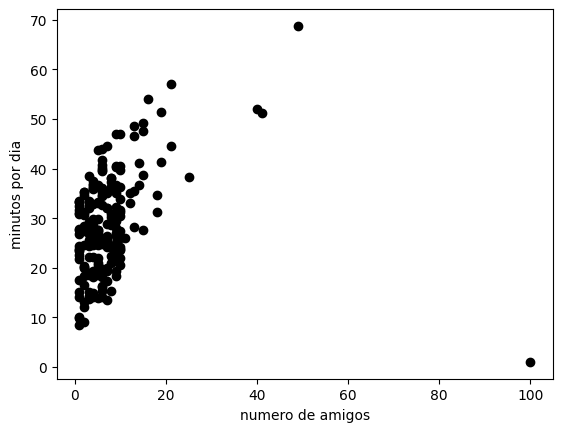

In [247]:
# gráfico de dispersão da correlação de numero de amigos e minutos gastos por dia
plt.scatter(num_friends,daily_minutes, c='black')
plt.ylabel("minutos por dia")
plt.xlabel("numero de amigos")

In [248]:
#  removendo o outlier
outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

Text(0.5, 0, 'numero de amigos')

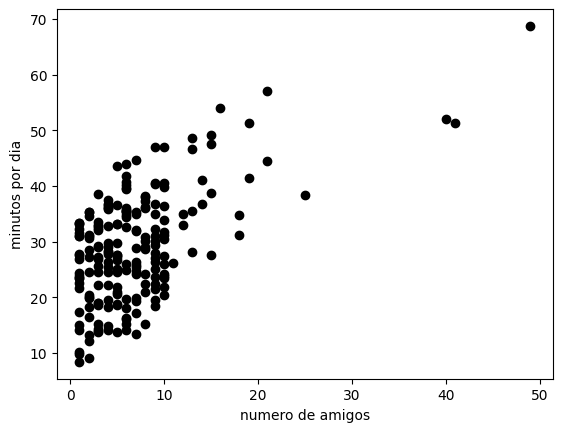

In [249]:
# gráfico de dispersão da correlação de numero de amigos e minutos gastos por dia
# mas sem o outlier
plt.scatter(num_friends_good, daily_minutes_good, c='black')
plt.ylabel("minutos por dia")
plt.xlabel("numero de amigos")

### **Probabilidade**

A teoria da probabilidade é um ramo da matemática que estuda a incerteza. Ela nos ajuda a fazer previsões sobre eventos futuros com base em dados ou observações anteriores.
<br/>
resumindo é a probabilidade de um evento ocorrer.
<br/>
vamos usar a teoria da probabilidade para construir e avaliar modelos.

In [250]:
# teste proposto no livro pagina 79, para probabilidade condicional
import enum, random
from enum import Enum

class Kid(Enum):
  BOY = 0
  GIRL = 1

def random_kid() -> Kid:
  return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
  younger = random_kid()
  older = random_kid()

  if older == Kid.GIRL:
    older_girl += 1
  if older == Kid.GIRL and younger == Kid.GIRL:
    both_girls += 1
  if older == Kid.GIRL or younger == Kid.GIRL:
    either_girl += 1

print("P(both | older)", round((both_girls / older_girl), 3))
print("P(both | either)", round((both_girls / either_girl), 3))

P(both | older) 0.501
P(both | either) 0.331


### **Teorema de Bayes**

É uma forma de reverter as probabilidades condicionais

In [251]:
# teorema de bayes
# P(E|F) = P(F|E)P(E)/[P(F|E)P(E) + P(F|¬E)P(¬E)]
P_d_t = (0.99 * 0.0001 / (0.99 * 0.0001 + 0.01 * 0.9999)) * 100
print(str(round(P_d_t, 2)) + "%")

0.98%


### **Distribuições Continuas**



In [252]:
def uniform_pdf(x: float) -> float:
  return 1 if 0 <= x < 1 else 0

def uniform_cdf(x: float) -> float:
  """Retorna a probabilidade de uma variável aleatória uniforme ser <= x"""
  if x < 0: return 0
  elif x < 1: return x
  else: return 1

### **Distribuição Normal**

In [253]:
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
  return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

In [254]:
plt.gca().clear()
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

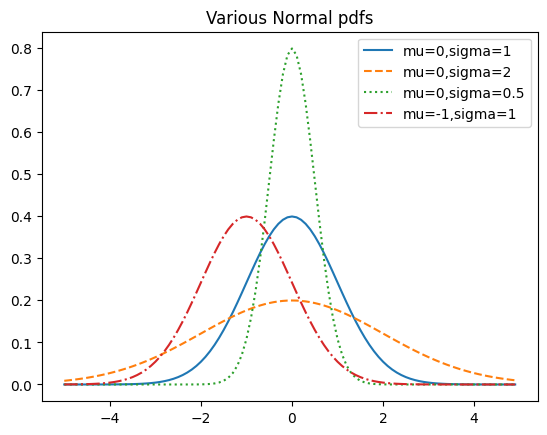

In [255]:
xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [256]:
plt.gca().clear()
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

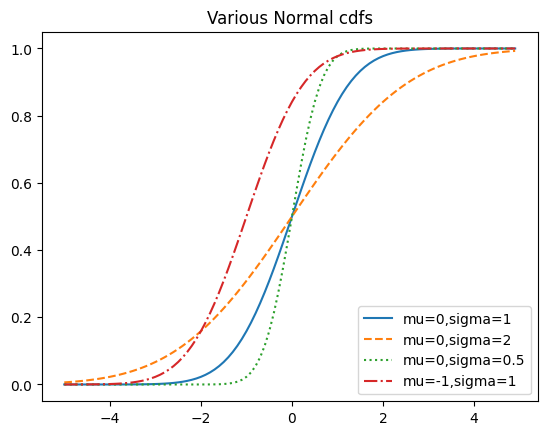

In [257]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [258]:
plt.gca().clear()
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

In [259]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z


import random

### **Teorema do Limite Central**

In [260]:
def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

In [261]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

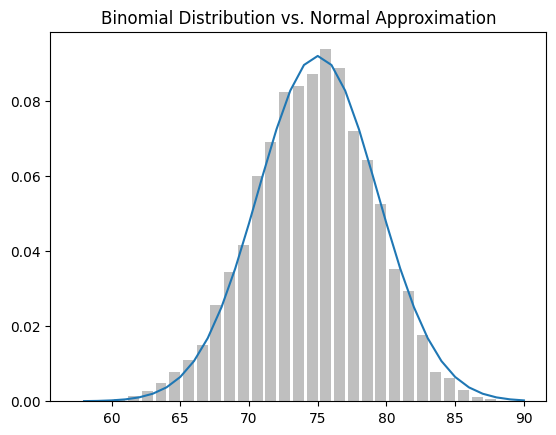

In [262]:
binomial_histogram(0.75, 100, 10000)

### **Hipótese e Inferência**


In [263]:
def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
  """Retorna mu e sigma correspondentes Binomial(n, p)"""
  mu = p * n
  sigma = math.sqrt(p * (1 - p) * n)
  return mu, sigma

In [264]:
normal_probability_below = normal_cdf

def normal_probability_above(lo: float, mu: float = 0, sigma: float = 1) -> float:
  """A probabilidade de que um N(mu, sigma) seja maior do que lo"""
  return 1 - normal_cdf(lo, mu, sigma)

def normal_probability_between(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    """A probabilidade  de que um N(mu, sigma) esteja entre lo e hi."""
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

def normal_probability_outside(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    """A probabilidade de que N(mu, sigma) não esteja lo e hi."""
    return 1 - normal_probability_between(lo, hi, mu, sigma)

In [265]:
def normal_upper_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    """Returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    """Returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float,
                            mu: float = 0,
                            sigma: float = 1) -> Tuple[float, float]:
    """
    Returns the symmetric (about the mean) bounds
    that contain the specified probability
    """
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

In [266]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
assert mu_0 == 500
assert 15.8 < sigma_0 < 15.9

In [267]:
# (469, 531)
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mu_0, sigma_0)
assert 468.5 < lower_bound < 469.5
assert 530.5 < upper_bound < 531.5

In [268]:
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

In [269]:
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

In [270]:
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability      # 0.887

assert 0.886 < power < 0.888

hi = normal_upper_bound(0.95, mu_0, sigma_0)
# is 526 (< 531, since we need more probability in the upper tail)

type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability      # 0.936

assert 526 < hi < 526.1
assert 0.9363 < power < 0.9364

In [271]:
def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
    """
    How likely are we to see a value at least as extreme as x (in either
    direction) if our values are from a N(mu, sigma)?
    """
    if x >= mu:
        # x is greater than the mean, so the tail is everything greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # x is less than the mean, so the tail is everything less than x
        return 2 * normal_probability_below(x, mu, sigma)

two_sided_p_value(529.5, mu_0, sigma_0)   # 0.062

0.06207721579598835

In [272]:
import random

extreme_value_count = 0
for _ in range(1000):
    num_heads = sum(1 if random.random() < 0.5 else 0    # Count # of heads
                    for _ in range(1000))                # in 1000 flips,
    if num_heads >= 530 or num_heads <= 470:             # and count how often
        extreme_value_count += 1                         # the # is 'extreme'

# p-value was 0.062 => ~62 extreme values out of 1000
# assert 59 < extreme_value_count < 67, f"{extreme_value_count}"

two_sided_p_value(531.5, mu_0, sigma_0)   # 0.0463

0.046345287837786575

In [273]:
tspv = two_sided_p_value(531.5, mu_0, sigma_0)
assert 0.0463 < tspv < 0.0464

upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

upper_p_value(524.5, mu_0, sigma_0) # 0.061

upper_p_value(526.5, mu_0, sigma_0) # 0.047

p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)   # 0.0158

normal_two_sided_bounds(0.95, mu, sigma)        # [0.4940, 0.5560]

p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000) # 0.0158
normal_two_sided_bounds(0.95, mu, sigma) # [0.5091, 0.5709]

(0.5091095927295919, 0.5708904072704082)

In [274]:
from typing import List

def run_experiment() -> List[bool]:
    """Flips a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment: List[bool]) -> bool:
    """Using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                      for experiment in experiments
                      if reject_fairness(experiment)])

assert num_rejections == 46

In [275]:
def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

z = a_b_test_statistic(1000, 200, 1000, 180)    # -1.14


assert -1.15 < z < -1.13

two_sided_p_value(z)                            # 0.254


assert 0.253 < two_sided_p_value(z) < 0.255

In [276]:
z = a_b_test_statistic(1000, 200, 1000, 150)    # -2.94
two_sided_p_value(z)                            # 0.003

def B(alpha: float, beta: float) -> float:
    """A normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x: float, alpha: float, beta: float) -> float:
    if x <= 0 or x >= 1:          # no weight outside of [0, 1]
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

### **Gradiente Descendente**

O gradiente descendente é um algoritmo de otimização usado para treinar modelos de aprendizagem de máquina, minimizando os erros entre os resultados previstos e os reais.

In [277]:
def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
  return (f(x + h) - f(x)) /h

In [278]:
def square(x: float) -> float:
  return x * x

def derivative(x: float) -> float:
  return 2 * x

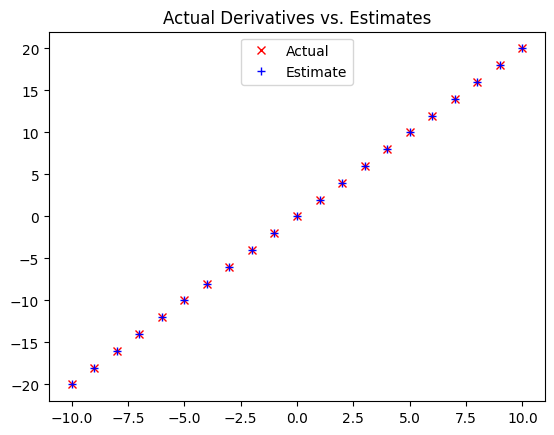

In [279]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
plt.legend(loc=9)
plt.show()

In [280]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                    v: Vector,
                                    i: int,
                                    h: float) -> float:
        """Returns the i-th partial difference quotient of f at v"""
        w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
             for j, v_j in enumerate(v)]

        return (f(w) - f(v)) / h

In [281]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

In [282]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

v = [random.uniform(-10, 10) for i in range(3)]

In [283]:
for epoch in range(1000):
        grad = sum_of_squares_gradient(v)    # compute the gradient at v
        v = gradient_step(v, grad, -0.01)    # take a negative gradient step
        print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001

0 [-3.031113190728192, -7.112918777659467, 1.2997564714060637]
1 [-2.970490926913628, -6.970660402106278, 1.2737613419779423]
2 [-2.911081108375355, -6.831247194064152, 1.2482861151383835]
3 [-2.8528594862078482, -6.694622250182869, 1.2233203928356158]
4 [-2.795802296483691, -6.560729805179212, 1.1988539849789035]
5 [-2.7398862505540174, -6.429515209075627, 1.1748769052793255]
6 [-2.685088525542937, -6.3009249048941145, 1.1513793671737391]
7 [-2.631386755032078, -6.174906406796232, 1.1283517798302642]
8 [-2.5787590199314367, -6.051408278660308, 1.105784744233659]
9 [-2.527183839532808, -5.930380113087102, 1.0836690493489858]
10 [-2.476640162742152, -5.81177251082536, 1.061995668362006]
11 [-2.4271073594873087, -5.695537060608853, 1.040755754994766]
12 [-2.3785652122975627, -5.581626319396676, 1.0199406398948705]
13 [-2.3309939080516116, -5.469993793008743, 0.999541827096973]
14 [-2.2843740298905795, -5.360593917148568, 0.9795509905550336]
15 [-2.2386865492927677, -5.253382038805597, 0.

In [284]:
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [285]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

In [286]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
        # Compute the mean of the gradients
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
        # Take a step in that direction
        theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.450619824763756, 0.9271257149384957]
1 [11.024363702597512, 0.9487220833333825]
2 [25.98269813245079, 0.9478490028693133]
3 [16.00548819465819, 0.9619360029960254]
4 [22.660301310165984, 0.9660176191846915]
5 [18.221545043738473, 0.9767458852564882]
6 [21.182206201711693, 0.9830139385297137]
7 [19.20745147739683, 0.992230116854366]
8 [20.524622094693168, 0.9994531080980542]
9 [19.646076515947755, 1.0079788239765513]
10 [20.232074942686825, 1.0156089428445458]
11 [19.841221622170732, 1.0238097999015436]
12 [20.101928987812023, 1.0316034019239113]
13 [19.928044968531303, 1.0396421241078755]
14 [20.04403364811373, 1.047490884828191]
15 [19.96667704759297, 1.0554399367066483]
16 [20.018281849192196, 1.063295733880828]
17 [19.983869302322688, 1.0711874242622585]
18 [20.00683036277503, 1.0790289187160567]
19 [19.99152317694777, 1.0868776912413995]
20 [20.00174091866708, 1.0946954590358646]
21 [19.994933502708093, 1.10250780903646]
22 [19.999481861502737, 1.1102977269210952]
23 [19.9964

In [287]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [288]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
  for batch in minibatches(inputs, batch_size=20):
          grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
          theta = gradient_step(theta, grad, -learning_rate)
  print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.505954650183103, 0.11695936191728233]
1 [19.155133176535443, 0.4260321155431824]
2 [19.676772391903025, 0.42809445664699713]
3 [20.278761586134618, 0.47417191694513877]
4 [20.03897536369434, 0.49918964060337545]
5 [21.807973493195828, 0.6158674570527628]
6 [19.10945292717411, 0.7385066660504461]
7 [20.232670717488418, 0.7642035690517065]
8 [19.877344100988676, 0.82780614851626]
9 [19.829064782078643, 0.8497786065056794]
10 [20.662404243658212, 0.8944214454404117]
11 [19.90453661866907, 1.1027945965094432]
12 [20.001109768873643, 1.275125843330047]
13 [20.2421925690876, 1.287567099742585]
14 [20.061132301608996, 1.3103771458679832]
15 [20.107405135441002, 1.3368136216233453]
16 [20.750394830764016, 1.371796109786169]
17 [20.0665830404686, 1.5676637966666793]
18 [19.870112326355258, 1.6302381468455918]
19 [19.87764119857879, 1.6500668598810138]
20 [20.109977736387915, 1.688249099310319]
21 [19.48534478782362, 1.7290326938116478]
22 [19.920949170104823, 1.7087401378295075]
23 [18.58

In [289]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
   for x, y in inputs:
       grad = linear_gradient(x, y, theta)
       theta = gradient_step(theta, grad, -learning_rate)
   print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.100361958686634, 0.0047746442555918495]
1 [20.096055413064192, 0.21908862074419508]
2 [20.091934286091345, 0.42420770889081993]
3 [20.087989953994043, 0.620526416441372]
4 [20.084214864344016, 0.8084223128294742]
5 [20.080601745696512, 0.9882567687328869]
6 [20.077143617979228, 1.1603756498611746]
7 [20.07383384728423, 1.3251099827212152]
8 [20.070666097598078, 1.4827765924716152]
9 [20.067634256456927, 1.6336787113893352]
10 [20.06473248795723, 1.7781065615156437]
11 [20.06195525231281, 1.916337913969026]
12 [20.059297120451912, 2.048638621452862]
13 [20.056753052616727, 2.175263130438912]
14 [20.054318137374626, 2.2964549716222953]
15 [20.05198767230129, 2.412447226592722]
16 [20.049757227676416, 2.5234629775716435]
17 [20.047622442659886, 2.6297157352265663]
18 [20.045579260975522, 2.731409849518087]
19 [20.04362373277726, 2.828740903498274]
20 [20.041752113788117, 2.921896088973864]
21 [20.039960784170756, 3.011054566374777]
22 [20.038246318198688, 3.096387809525087]
23 [20.0

### **Obtendo Dados**

In [290]:
#  obtendo dados da web
from bs4 import BeautifulSoup
import requests

In [291]:
url = ("https://raw.githubusercontent.com/" "joelgrus/data/master/getting-data.html")
html = requests.get(url).text
soup = BeautifulSoup(html, 'lxml')
print(soup)

<!DOCTYPE html>
<html lang="en-US">
<head>
<title>Getting Data</title>
<meta charset="utf-8"/>
</head>
<body>
<h1>Getting Data</h1>
<div class="explanation">
        This is an explanation.
    </div>
<div class="comment">
        This is a comment.
    </div>
<div class="content">
<p id="p1">This is the first paragraph.</p>
<p class="important">This is the second paragraph.</p>
</div>
<div class="signature">
<span id="name">Joel</span>
<span id="twitter">@joelgrus</span>
<span id="email">joelgrus-at-gmail</span>
</div>
</body>
</html>



In [292]:
first_paragraph = soup.find('p').text
first_paragraph

'This is the first paragraph.'

In [293]:
first_paragraph_words = soup.p.text.split()
first_paragraph_words

['This', 'is', 'the', 'first', 'paragraph.']

In [294]:
all_paragraphs = soup("p")
display("all:", all_paragraphs)
paragraph_with_ids = [p for p in soup('p') if p.get("id")]
display("With id:", paragraph_with_ids)

'all:'

[<p id="p1">This is the first paragraph.</p>,
 <p class="important">This is the second paragraph.</p>]

'With id:'

[<p id="p1">This is the first paragraph.</p>]

In [295]:
important_paragraphs = soup("p", {"class": "important"})
display(important_paragraphs)

[<p class="important">This is the second paragraph.</p>]

In [296]:
span_inside_divs = [span for div in soup("div") for span in div("span")]
display(span_inside_divs)

[<span id="name">Joel</span>,
 <span id="twitter">@joelgrus</span>,
 <span id="email">joelgrus-at-gmail</span>]

In [297]:
# Exemplo: Monitorando o Congresso
url = "https://www.house.gov/representatives"
text = requests.get(url).text
soup = BeautifulSoup(text, "lxml")

In [298]:
all_urls = [a["href"] for a in soup('a') if a.has_attr("href")]
display(all_urls)

['#main-content',
 '/',
 '/',
 '/representatives',
 '/leadership',
 '/committees',
 '/legislative-activity',
 '/the-house-explained',
 '/visitors',
 '/educators-and-students',
 '/media',
 '/doing-business-with-the-house',
 '/employment',
 '/representatives',
 '/leadership',
 '/committees',
 '/legislative-activity',
 '/the-house-explained',
 '/visitors',
 '/educators-and-students',
 '/media',
 '/doing-business-with-the-house',
 '/employment',
 '/the-house-explained',
 'https://www.aoc.gov/explore-capitol-campus/buildings-grounds/house-office-buildings/cannon',
 'https://www.aoc.gov/explore-capitol-campus/buildings-grounds/house-office-buildings/longworth',
 'https://www.aoc.gov/explore-capitol-campus/buildings-grounds/house-office-buildings/rayburn',
 'https://www.visitthecapitol.gov/visit/maps-and-brochures/us-capitol-map',
 '#room-numbers',
 '#by-state',
 '#by-name',
 '#state-alabama',
 '#state-california',
 '#state-delaware',
 '#state-florida',
 '#state-georgia',
 '#state-hawaii',
 '

In [299]:
print(len(all_urls))
import re
regex = r"https?://.*\.house\.gov/?$"

assert re.match(regex, "http://joel.house.gov")
assert re.match(regex, "https://joel.house.gov")
assert re.match(regex, "http://joel.house.gov/")
assert re.match(regex, "https://joel.house.gov/")
assert not re.match(regex, "joel.house.gov")
assert not re.match(regex, "http://joel.house.com")
assert not re.match(regex, "https://joel.house.gov/biography")

967


In [300]:
good_urls = [url for url in all_urls if re.match(regex, url)]
print(len(good_urls))
good_urls = list(set(good_urls))
print(len(good_urls))
display(good_urls)

870
435


['https://lofgren.house.gov/',
 'https://clayhiggins.house.gov',
 'https://takano.house.gov',
 'https://wenstrup.house.gov',
 'https://womack.house.gov/',
 'https://finstad.house.gov/',
 'https://frankel.house.gov',
 'https://bucshon.house.gov/',
 'https://scholten.house.gov',
 'https://norcross.house.gov',
 'https://langworthy.house.gov',
 'https://blakemoore.house.gov',
 'https://wild.house.gov',
 'https://millermeeks.house.gov/',
 'https://carbajal.house.gov',
 'https://juliabrownley.house.gov',
 'https://bowman.house.gov',
 'https://fulcher.house.gov/',
 'https://cloud.house.gov',
 'https://hinson.house.gov',
 'https://kelly.house.gov',
 'https://youngkim.house.gov',
 'https://garbarino.house.gov',
 'https://jasonsmith.house.gov',
 'https://trentkelly.house.gov/',
 'https://troycarter.house.gov',
 'https://johnjoyce.house.gov/',
 'https://schneider.house.gov',
 'https://veasey.house.gov',
 'https://courtney.house.gov/',
 'https://casten.house.gov',
 'https://brecheen.house.gov',
 '

In [301]:
import json

github_user = "hernandemonteiro"
endpoint = f"https://api.github.com/users/{github_user}/repos"

repos = json.loads(requests.get(endpoint).text)

In [302]:
print(len(repos))

30


In [303]:
used_languages = [repo["language"] for repo in repos]
display(list(set(used_languages)))

['TypeScript',
 'HTML',
 'C++',
 'Python',
 'Jupyter Notebook',
 'JavaScript',
 'Dockerfile',
 'Clojure',
 None]

In [304]:
# Também usamos as libs como pandas para ler dados em sites e coisas assim

### **Trabalhando com Dados**

In [305]:
from typing import Dict

def bucketize(point: float, bucket_size: float) -> float:
  """Coloque o ponto perto do próximo minímo múltiplo de bucket_size"""
  return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
  """Coloca os pontos em buckets e conta o número de pontos em cada bucket"""
  return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
  histogram = make_histogram(points, bucket_size)
  plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
  plt.title(title)

In [306]:
random.seed(0)

uniform = [200 * random.random() - 100 for _ in range(10000)]

normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

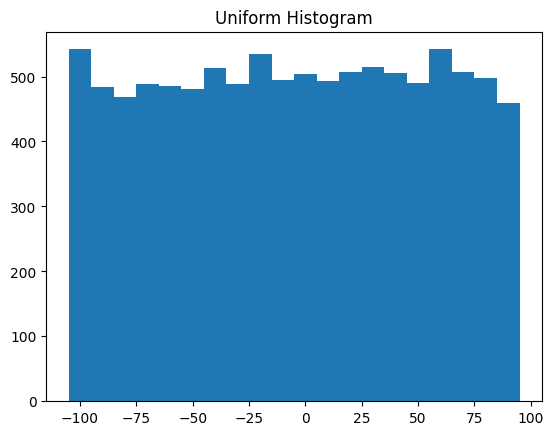

In [307]:
plot_histogram(uniform, 10, "Uniform Histogram")

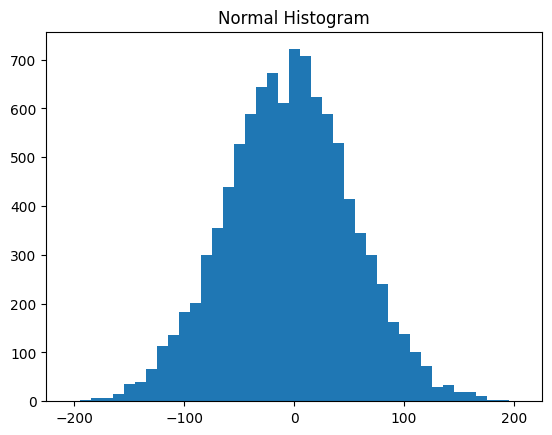

In [308]:
plot_histogram(normal, 10, "Normal Histogram")

In [309]:
def random_normal() -> float:
  """Retorna um ponto aleatório de uma distribuição normal padrão"""
  return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

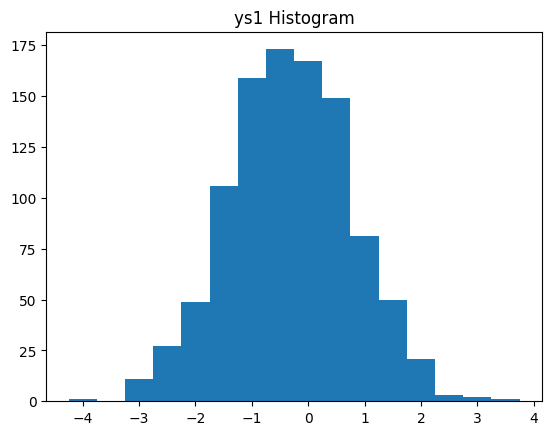

In [310]:
plot_histogram(ys1, 0.5, "ys1 Histogram")

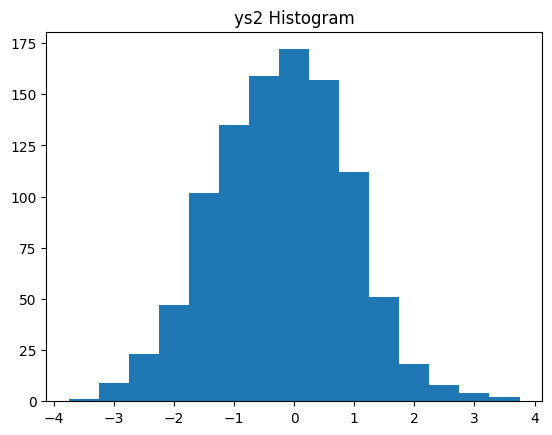

In [311]:
plot_histogram(ys2, 0.5, "ys2 Histogram")

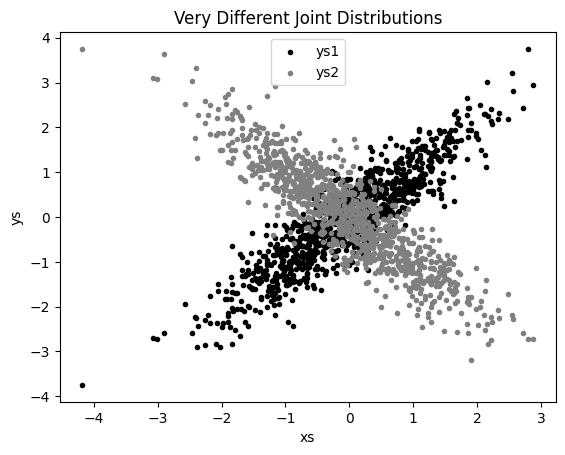

In [312]:
plt.scatter(xs, ys1, marker=".", color="black", label="ys1")
plt.scatter(xs, ys2, marker=".", color="gray", label="ys2")
plt.xlabel("xs")
plt.ylabel("ys")
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [313]:
print(round(correlation(xs, ys1), 1))
print(round(correlation(xs, ys2), 1))

0.9
-0.9


In [314]:
def correlation_matrix(data: List[Vector]) -> Matrix:
  """
  Retorna a matriz len(data) x len(data), na qual
  a entrada (i,j) é a correlação entre data[i] e data[j]
  """

  def correlation_ij(i: int, j: int) -> float:
    return (correlation(data[i], data[j]))

  return make_matrix(len(data), len(data), correlation_ij)

In [315]:
def random_row() -> List[float]:
       row = [0.0, 0, 0, 0]
       row[0] = random_normal()
       row[1] = -5 * row[0] + random_normal()
       row[2] = row[0] + row[1] + 5 * random_normal()
       row[3] = 6 if row[2] > -2 else 0
       return row

random.seed(0)

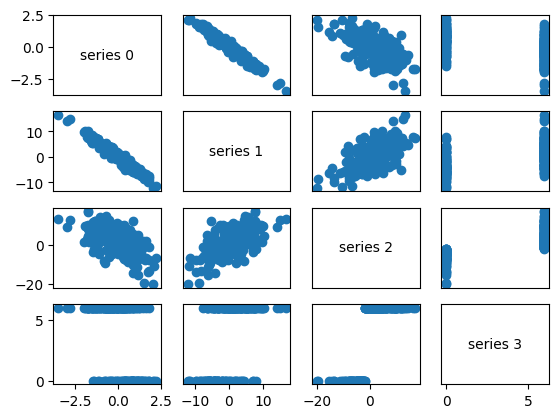

In [316]:
corr_rows = [random_row() for _ in range(num_points)]
corr_data = [list(col) for col in zip(*corr_rows)]

num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
  for j in range(num_vectors):
    # Scatter column_j on the x-axis vs column_i on the y-axis,
     if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])


     else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                    xycoords='axes fraction',
                                    ha="center", va="center")

       # Then hide axis labels except left and bottom charts
     if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
     if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

In [317]:
corr_dataframe = pd.DataFrame(corr_rows)
corr_data_dataframe = pd.DataFrame(corr_data)

In [318]:
corr_dataframe.corr(method="spearman", numeric_only=True)

,0,1,2,3
0,1.000000,-0.975268,-0.607517,-0.480293
1,-0.975268,1.000000,0.619388,0.498292
2,-0.607517,0.619388,1.000000,0.825070
3,-0.480293,0.498292,0.825070,1.000000


#### **NamedTuples***

In [319]:
import datetime

In [323]:
#  Jeito tradicional e perigoso de escrver um Dict
stock_price = {
    'closing_price': 102.06,
    'date': datetime.date(2014, 8, 29),
    'symbol': 'AAPL'
}

# mas está sujeito a erros como o abaixo, digamos
# que queremos mudar o closing_price, mas erramos a digitação
stock_price['cosing_price'] = 103.06

display(stock_price)

{'closing_price': 102.06,
 'date': datetime.date(2014, 8, 29),
 'symbol': 'AAPL',
 'cosing_price': 103.06}

In [336]:
# mas para resolver isso podemos recorrer as NamedTuple
from collections import namedtuple
StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])

price = StockPrice("MSFT", datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
# nesse caso resolvemos o problema de ser imutável e não receber outros valores,
# mas ainda não resolvemos a anotação de tipo
display(price)

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [358]:
# para isso vamos usar uma variante tipada NamedTuple
from typing import NamedTuple

class StockPrice(NamedTuple):
  symbol: str
  date: datetime.date
  closing_price: float

  def is_high_tech(self) -> bool:
    '''Como é uma classe, também podemos adicionar métodos'''
    return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

display(price)
# são imutáveis por exemplo, a atribuição abaixo gera um erro
# price.symbol = 'GOOG'

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

#### **Dataclasses**
mais ou menos parecidas com o NamedTuple, apenas acima da versão 3.7, elas são decorators de classes, estão sucetiveis aos mesmos erros que os dicts puros, então não vamos usar, mas serão comuns no dia a dia

In [361]:
# exemplo de dataclasse
from dataclasses import dataclass

@dataclass
class StockPrice2:
  symbol: str
  date: datetime.date
  closing_price: float

  def is_high_tech(self) -> bool:
    '''Como é uma classe, também podemos adicionar métodos'''
    return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

display(price)
# diferente de namedtuple ele pode ser modificado, o que pode gerar erros
price.symbol = 'GOOG'
display(price)

StockPrice2(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

StockPrice2(symbol='GOOG', date=datetime.date(2018, 12, 14), closing_price=106.03)

#### **Limpando e Estruturando os Dados**

Comumente no dia a dia de quem lida com dados, vai ser necessário limpar os dados antes de utilizar, é o que vamos fazer a seguir.

In [362]:
from typing import Optional
from dateutil.parser import parse

def try_parse_row(row: List[str]) -> StockPrice:
  symbol, date_, closing_price_ = row

  # Os simbolos devem ser letras maiusculas
  if not re.match(r'^[A-Z]+$', symbol):
    return None

  try:
    date = parse(date_).date()
  except ValueError:
    return None

  try:
    closing_price = float(closing_price_)
  except ValueError:
    return None

  return StockPrice(symbol, date, closing_price)

  assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
  assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is None
  assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None

  assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) is not None
